In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [157]:
df = pd.read_csv("F:\\3.data_sets\\Bengaluru_House_Data.csv")

In [158]:
df.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [180]:
df.shape
dff = df.drop(["area_type","availability"],axis=1)
dff.corr()["balcony"]

bath       0.204201
balcony    1.000000
price      0.120355
Name: balcony, dtype: float64

In [6]:
print(df.isnull().sum())
new_df = df.drop(["area_type","availability","society","balcony"],axis=1)

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64


In [7]:
new_df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
new_df.isnull().sum()


location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
new_df.shape

(13320, 5)

In [10]:
df1 = new_df.dropna()

In [11]:
df1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [13]:
#LETS TOKENIZE #tokens are strings
df1["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [14]:
df1["bhk"] = df1["size"].apply(lambda x: int(x.split(" ")[0]))

<ipython-input-14-60c18be040da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["bhk"] = df1["size"].apply(lambda x: int(x.split(" ")[0]))


In [15]:
df1.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [16]:
df1[df1.bhk > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [17]:
df1.head()


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [18]:
type(df1.total_sqft.unique()[3])


str

In [19]:
#lets try out a function
def avg_sqft(x):
    tokens = x.split("-") # string
    if(len(tokens) == 2):
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [20]:
avg_sqft("1056-1450")

1253.0

In [21]:
df2 = df1.copy()
df2["total_sqft"] = df2["total_sqft"].apply(avg_sqft)

In [22]:
df2[df2["total_sqft"].isnull()==True].shape


(46, 6)

In [23]:
df3 = df2.copy() #deep copying

In [24]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [25]:
# FEA STARTS HERE!!

df3["price_per_sqft"] = (df3["price"]*10**5)/(df3["total_sqft"])

In [26]:
df3.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [27]:
len(df3["location"].unique())

1304

In [28]:
df3["location"] = df3["location"].apply(lambda x: x.strip())

location_stats = df3.groupby("location")["location"].agg("count").sort_values(ascending = False)
location_stats
len(location_stats[location_stats <= 10])
location_stats_less_10 = location_stats[location_stats <= 10]
location_stats_less_10.head()
# df3["location"].unique().shape
df3["location"] = df3["location"].apply(lambda x: "other" if x in location_stats_less_10 else x)
df3["location"].unique().shape

(242,)

In [29]:
df3[df3["total_sqft"]/df3["bhk"] < 300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [181]:
# filter the rows which contains area for rooms which is less than 300
df4 = df3[~(df3["total_sqft"]/df3["bhk"] < 300)]
df4.shape


(12502, 7)

In [31]:
# dfff=df3[df3["total_sqft"]/df3["bhk"] >= 300]
# dfff.shape
# Here null values were removed by me, just a check

In [32]:
# outlier removal
df4["price_per_sqft"].describe()


count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [33]:
def remove_pps_outlier(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby("location"):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft < (m+st))]
        df_out = pd.concat([df_out,reduced_df],  ignore_index = True)
    return df_out

In [34]:
df5 = remove_pps_outlier(df4)
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


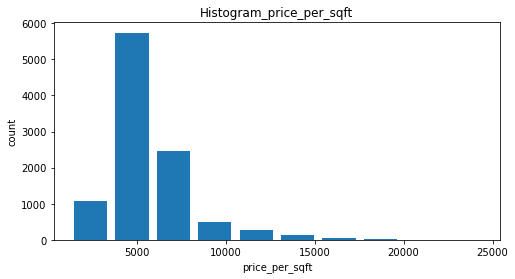

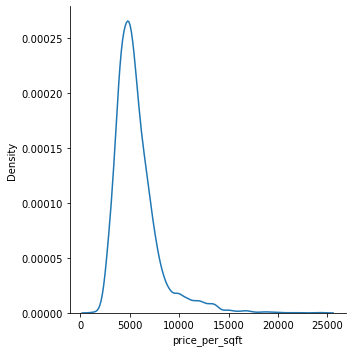

In [35]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (8,4)
plt.hist(df5.price_per_sqft,rwidth = 0.8)
plt.xlabel("price_per_sqft")
plt.ylabel("count")
plt.title("Histogram_price_per_sqft")
import seaborn as sns
sns.displot(df5.price_per_sqft, kind="kde")

In [36]:
df5[df5["bath"]>10].shape
df5.shape

(10241, 7)

Text(0, 0.5, 'counts')

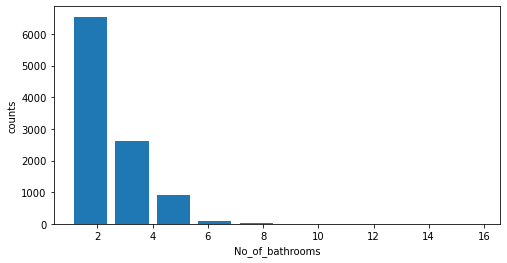

In [37]:
plt.hist(df5.bath,rwidth=0.8)
plt.xlabel("No_of_bathrooms")
plt.ylabel("counts")


In [38]:
df6 = df5 [df5.bath <= df5.bhk+2]
df6.shape

(10237, 7)

In [39]:
df7 = df6.drop(["size","price_per_sqft"],axis=1)
df7.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [40]:
#OHE(one hot encoding) for the CATEGORICAL COLUMN location
dummies = pd.get_dummies(df7["location"]) # I stored values in dummy variable for location column(categorical) for ML execution.
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [162]:
df8 = pd.concat([df7,dummies.drop("other",axis=1)],axis=1)# columns = 1, dummies variable trap,removed by dropping "other"
df8.head()


,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [169]:
df9 = df8.drop("location",axis=1)
df9.head(2)


,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [182]:
X = df9.drop("price",axis=1)
y = df9["price"]
y.shape

(10237,)

In [183]:
from sklearn.model_selection import train_test_split

In [184]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [185]:
from sklearn.linear_model import LinearRegression

In [186]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [187]:
lr.score(X_test,y_test)

0.7967134710946959

In [188]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7967134710946959

In [189]:
lr.intercept_


-14.604917899277297

In [190]:
lr.coef_


array([ 7.16744726e-02,  8.95713416e+00, -7.72008207e+00,  1.41548926e+02,
        3.11435159e+01, -3.27334836e+01,  1.73749303e+02, -3.66850000e+01,
       -1.78651563e+01,  1.70081644e+01,  3.00783228e+00, -2.20995922e+01,
       -1.93379095e+01, -1.76292514e+01, -2.88720463e+01, -1.93949698e+01,
       -7.16009788e+00, -2.37413600e+00, -1.19986525e+01, -2.37431073e+01,
       -2.68415212e+01, -2.16094039e+01, -2.69678063e+01, -1.83752240e+01,
       -1.61170641e+01, -1.81422316e+01, -1.22380042e+01,  1.15862002e+01,
       -8.02875135e+00, -2.74886305e+01,  1.18922726e-01,  1.31970817e+00,
       -1.23505492e+01,  8.69153467e+01, -1.01538914e+00, -3.30485592e+01,
       -4.02230759e+01, -9.86782548e+00, -8.95804498e+00,  1.32321347e+01,
       -1.63272563e+01,  4.63674874e+01,  4.30204812e+01, -2.82770038e+01,
       -2.96408336e+01, -3.25114322e+01, -1.24404175e+01,  1.96265316e+02,
       -2.09992660e+01, -1.51311822e+01, -2.45379332e+00,  3.33889903e+01,
       -1.45602197e+01, -

In [191]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size = 0.2, random_state=0)
loop = cross_val_score(LinearRegression(), X, y, cv=cv)
sums = 0
for i in range(len(loop)):
    sums+=(loop[i])*100
print("Average = ", sums/(i+1))
print("The score for each splits =",loop)

Average =  81.18498592075449
The score for each splits = [0.81293955 0.77537358 0.82415698 0.80235722 0.84442196]


In [192]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import Lasso
# from sklearn.tree import DecisionTreeRegressor

In [193]:
# np.where(X.columns=="1st Block Jayanagar")[0][0]

In [194]:
X.columns


Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [197]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr.predict([x])[0]
predict_price('Indira Nagar',1000,2,2)

160.77996086766078

In [199]:
import pickle
with open("bangalore_house_prediction_model.pickle","wb") as f:
    pickle.dump(lr,f)

In [202]:
import json
columns = { "data_columns" : [col.lower() for col in X.columns]}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))